In [3]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 8.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [4]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [5]:
from tqdm import tqdm
tqdm.pandas()

In [6]:
data = pd.read_csv("data.csv")

In [7]:
data.drop(columns=["ArticleId"], inplace=True)

In [8]:
data

Text       Category
0     worldcom ex-boss launches defence lawyers defe...       business
1     german business confidence slides german busin...       business
2     bbc poll indicates economic gloom citizens in ...       business
3     lifestyle  governs mobile choice  faster  bett...           tech
4     enron bosses in $168m payout eighteen former e...       business
...                                                 ...            ...
1485  double eviction from big brother model caprice...  entertainment
1486  dj double act revamp chart show dj duo jk and ...  entertainment
1487  weak dollar hits reuters revenues at media gro...       business
1488  apple ipod family expands market apple has exp...           tech
1489  santy worm makes unwelcome visit thousands of ...           tech

[1490 rows x 2 columns]

In [88]:
import re
from bs4 import BeautifulSoup
import string
import wordninja as wn
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string
import nltk 
# nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')

def preprocessing(sentence):
    # make smallercase
    sentence = sentence.lower()

#     # remove emails
#     sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

#     # remove mentions
#     sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)

#     # Remove html
#     sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()

#     # Remove URL
#     sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)

    # Removing punctutation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

#     # Spliting words into two meaningful word
#     sentence = ' '.join(wn.split(str(sentence)))

#     # Correct the sentence
#     sentence =  str(TextBlob(sentence).correct())

    # decontracted

    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)
    
    # Punctuation Removal
    sentence = "".join(i for i in sentence if i not in string.punctuation)
    
    # Stop Word Removal
    sentence = " ".join(i for i in sentence.split() if i not in allstopwords)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = [lm.lemmatize(i) for i in sentence.split()]
    return snt

In [90]:
data["Tokens"] = data.Text.progress_apply(lambda x: preprocessing(x)) 

100%|██████████████████████████████████████| 1490/1490 [00:04<00:00, 328.54it/s]


In [91]:
data

Text       Category  \
0     world com ex bos launch defence lawyer defendi...       business   
1     german business confidence slide german busine...       business   
2     bbc poll indicates economic gloom citizen majo...       business   
3     lifestyle governs mobile choice faster better ...           tech   
4     enron boss pay eighteen former enron director ...       business   
...                                                 ...            ...   
1485  double eviction big brother model caprice holb...  entertainment   
1486  dj double act revamp chart show dj duo jk joel...  entertainment   
1487  weak dollar hit reuters revenue medium group r...       business   
1488  apple ipod family expands market apple expande...           tech   
1489  santy worm make unwelcome visit thousand websi...           tech   

                                                 Tokens  
0     [world, com, ex, bos, launch, defence, lawyer,...  
1     [german, business, confidence, slide, german, ...  
2     [bbc, poll, indicates, economic, gloom, citize...  
3     [lifestyle, governs, mobile, choice, faster, b...  
4     [enron, bos, pay, eighteen, former, enron, dir...  
...                                                 ...  
1485  [double, eviction, big, brother, model, capric...  
1486  [dj, double, act, revamp, chart, show, dj, duo...  
1487  [weak, dollar, hit, reuters, revenue, medium, ...  
1488  [apple, ipod, family, expands, market, apple, ...  
1489  [santy, worm, make, unwelcome, visit, thousand...  

[1490 rows x 3 columns]

In [92]:
# Data Visualization

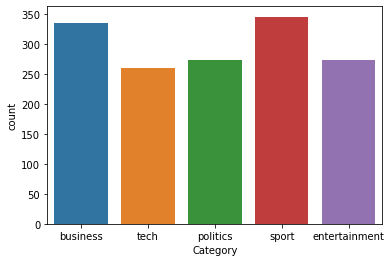

In [93]:
sns.countplot(data=data, x='Category')
plt.show()

In [94]:
data.to_csv('news_article_sorting.csv', index=False)

# TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

Tfidf_Vectorizer = TfidfVectorizer()

X = Tfidf_Vectorizer.fit_transform(data.Text)

X_array = X_TFIDF.toarray()

pd.DataFrame(data=X_array, columns = Tfidf_Vectorizer.get_feature_names_out()).head(3)

aaa  aac  aaliyah  aamir  aaron   ab  aba  abacus  abandon  abandoned  ...  \
0  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   
1  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   
2  0.0  0.0      0.0    0.0    0.0  0.0  0.0     0.0      0.0        0.0  ...   

   zonealarm  zoom  zorro  zulu  zur  zurich  zutons  zvonareva  zyk   zz  
0        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  
1        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  
2        0.0   0.0    0.0   0.0  0.0     0.0     0.0        0.0  0.0  0.0  

[3 rows x 20400 columns]

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=40)

In [63]:
X_train.shape

(998, 20400)

In [64]:
X_test.shape

(492, 20400)

## Model Building

In [65]:
from sklearn.linear_model import LogisticRegression

# Check Cross Validation Score

clf = LogisticRegression(random_state=42, max_iter=1000)
np.average(cross_val_score(clf, X, y, cv=10))

0.9677852348993289

In [66]:
clf_l2 = LogisticRegression(penalty="l2", C=50, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.9724832214765101

In [67]:
clf_l2 = LogisticRegression(penalty="l2", C=20, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.9731543624161075

In [68]:
clf_l2 = LogisticRegression(penalty="l2", C=10, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.9731543624161075

In [69]:
clf_l2 = LogisticRegression(penalty="l2", C=100, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.9724832214765101

In [70]:
clf_l1 = LogisticRegression(penalty="l1", C=20, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

0.9583892617449663

In [71]:
clf_l1 = LogisticRegression(penalty="l1", C=50, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

0.9610738255033556

In [72]:
clf_l1 = LogisticRegression(penalty="l1", C=35, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

0.959731543624161

In [73]:
clf_l1 = LogisticRegression(penalty="l1", C=40, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

0.9604026845637582

# 2. Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(max_depth=10, random_state=18)

rfc1.fit(X_train, y_train)
y_predicted = rfc1.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.943089430894309


In [75]:
rfc2 = RandomForestClassifier(max_depth=20, random_state=25)

rfc2.fit(X_train, y_train)
y_predicted = rfc2.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9715447154471545


In [76]:
rfc3 = RandomForestClassifier(max_depth=50, random_state=38)

rfc3.fit(X_train, y_train)
y_predicted = rfc3.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9735772357723578


In [77]:
rfc4 = RandomForestClassifier(max_depth=100, random_state=80)

rfc4.fit(X_train, y_train)
y_predicted = rfc4.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9695121951219512


In [78]:
rfc5 = RandomForestClassifier(max_depth=200, random_state=150)

rfc5.fit(X_train, y_train)
y_predicted = rfc5.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9654471544715447


In [79]:
rfc6 = RandomForestClassifier(max_depth=300, random_state=280)

rfc6.fit(X_train, y_train)
y_predicted = rfc6.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.967479674796748


In [80]:
rfc7 = RandomForestClassifier(max_depth=400, random_state=320)

rfc7.fit(X_train, y_train)
y_predicted = rfc7.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9573170731707317


In [81]:
rfc8 = RandomForestClassifier(max_depth=800, random_state=500)

rfc8.fit(X_train, y_train)
y_predicted = rfc8.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.967479674796748


In [82]:
rfc9 = RandomForestClassifier(max_depth=500, random_state=480)

rfc9.fit(X_train, y_train)
y_predicted = rfc9.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9654471544715447
